# Attention Toxicity Model

In [32]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_tool import AttentionToxModel
import random

## Load Data

In [22]:
SPLITS = ['train', 'dev', 'test']

wiki = {}
debias = {}
random = {}
for split in SPLITS:
    wiki[split] = '../data/wiki_%s.csv' % split
    debias[split] = '../data/wiki_debias_%s.csv' % split
    random[split] = '../data/wiki_debias_random_%s.csv' % split

## Train Model

In [28]:
MODEL_NAME = 'cnn_attention_random_tox_v5'
model = AttentionToxModel()
model.train(random['train'], random['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 20
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: cnn_attention_random_tox_v5
max_sequence_length: 250
stop_early: True
embedding_trainable: False



----- activations -----
(58, 250)


array([  4.07489970e-05,   7.23827179e-05,   4.03804646e-04, ...,
         3.46041960e-03,   3.66222695e-03,   3.44262132e-03], dtype=float32)

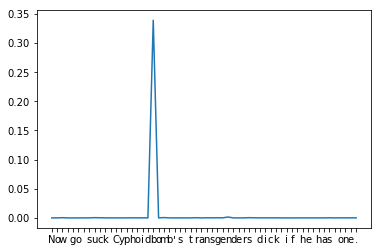

----- activations -----
(73, 250)


array([  2.87187049e-06,   8.57596478e-06,   1.00880716e-04, ...,
         3.42189288e-03,   4.28603450e-03,   3.86144291e-03], dtype=float32)

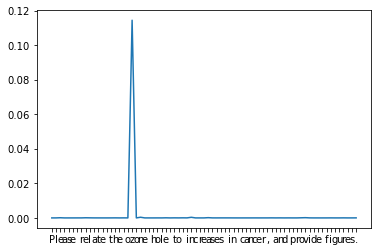

----- activations -----
(185, 250)


array([  5.84759086e-09,   3.89753687e-08,   1.52615780e-06, ...,
         3.38792196e-03,   4.04390320e-03,   3.62059637e-03], dtype=float32)

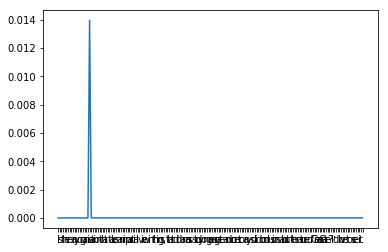

----- activations -----
(96, 250)


array([  4.97704332e-06,   1.59906722e-05,   9.62080958e-05, ...,
         3.50773591e-03,   3.66381533e-03,   3.56236054e-03], dtype=float32)

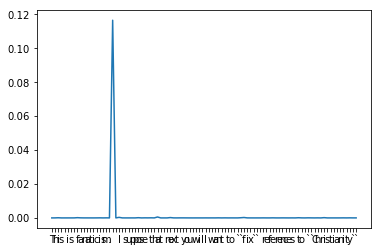

[ 0.68332732  0.00453487  0.05003132  0.02246417]


In [33]:
import keras.backend as K 
def get_activations(model, inputs, print_shape_only=False, layer_name=None):
    # Documentation is available online on Github at the address below.
    # From: https://github.com/philipperemy/keras-visualize-activations
    print('----- activations -----')
    activations = []
    inp = model.input
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions
    layer_outputs = [func([inputs, 1.])[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

# some selected passages of text from the wikipedia toxicity dataset
input_texts = [
        'Now go suck Cyphoidbomb\'s transgenders dick if he has one.',
        'Please relate the ozone hole to increases in cancer, and provide figures.',
        'Is there any organisation that takes an impartial view in things, that did a mass study on gamergate and come to any solid conclusions about the nature of GamerGate? I\'d love to see it.',
        'This is fanaticism.  I suppose that next you will want to ``fix`` references to ``Christianity``']

def run_graph(input_texts):
    for input_text in input_texts:
        activations = get_activations(model.probs_model, model.prep_text(input_text), 
                                      print_shape_only=True,layer_name="attention_vec")
        activations_flat = activations[0].flatten()
        # 250 activations per character
        display(activations_flat)
        small = np.squeeze(activations_flat)[:len(input_text)]
        plt.plot(range(len(input_text)),small)
        plt.xticks(range(len(input_text)), [x for x in input_text])
        plt.show()

# run graphing
run_graph(input_texts)
# print the toxicity of each text
print(model.predict(input_texts))
